<div style="background-color: #000000; color: black; font-size: 36px; padding: 10px;">
  <strong><div style="background-color: #ffffcc; color: black; font-size: 30px; padding: 10px;">
  <strong>CodeUp Anomaly Detection
      </div></div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import env
import wrangle as w

## Data Dictionary
| Feature       | Definition                                 |
|---------------|--------------------------------------------|
| date        | Date where a log or path occurs (index)  |
| time        | Time of the log |
| path        | Web address |
| user_id     | Personal identification number for a single student or staff |
| cohort_id   | Identification number for a particular cohort   |
| ip          | Intermet address for the log |
| cohort_name | Name of the cohort |
| program_id  | Identification number for the program the student or staff is in |
| start_date  | Cohort start date  |
| end_date    | Cohort end date |
| updated_at  | Last log from the user |

In [2]:
# Bringing in the combined logs and cohorts data
codeup_df = w.get_codeup_data()
codeup_df.sample(10)

,date,time,path,user_id,cohort_id,ip,cohort_name,program_id,start_date,end_date,updated_at
464606,2020-03-24,16:36:00,java-iii,146,28.0,70.115.238.206,Staff,2,2014-02-04,2014-02-04,2018-12-06 17:04:19
474971,2020-04-05,12:46:45,6-regression/5.0-evaluate,589,55.0,70.130.127.113,Curie,3,2020-02-03,2020-07-07,2020-02-03 19:31:51
182296,2019-01-29,09:56:30,mysql/sample-database,1,28.0,97.105.19.58,Staff,2,2014-02-04,2014-02-04,2018-12-06 17:04:19
842758,2021-04-19,10:08:15,html-css/css-ii/bootstrap-grid-system,931,138.0,104.53.212.101,Neptune,2,2021-03-15,2021-09-03,2021-03-15 19:57:09
756615,2021-02-02,14:49:23,javascript-i/bom-and-dom,434,33.0,76.198.205.14,Ceres,2,2019-07-15,2019-12-11,2019-07-15 16:57:21
449517,2020-03-06,14:27:44,jquery/essential-methods/attributes-and-css,559,53.0,97.105.19.58,Fortuna,2,2020-01-13,2020-06-23,2020-01-13 21:17:08
734389,2021-01-13,11:23:14,mysql/functions,764,62.0,72.190.174.52,Jupiter,2,2020-09-21,2021-03-30,2020-09-21 18:06:27
578548,2020-07-21,09:08:53,3-sql/4-tables,695,59.0,162.197.239.66,Darden,3,2020-07-13,2021-01-12,2020-07-13 18:32:19
369693,2019-11-14,13:59:09,1-fundamentals/modern-data-scientist.jpg,473,34.0,97.105.19.58,Bayes,3,2019-08-19,2020-01-30,2019-08-20 14:38:55
46522,2018-04-26,10:03:50,javascript-i/bom-and-dom/dom-events,131,23.0,97.105.19.61,Ulysses,2,2018-03-05,2018-07-19,2018-03-05 14:22:11


In [3]:
# Finding things out about the data
codeup_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847330 entries, 0 to 847329
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         847330 non-null  object 
 1   time         847330 non-null  object 
 2   path         847329 non-null  object 
 3   user_id      847330 non-null  int64  
 4   cohort_id    847330 non-null  float64
 5   ip           847330 non-null  object 
 6   cohort_name  847330 non-null  object 
 7   program_id   847330 non-null  int64  
 8   start_date   847330 non-null  object 
 9   end_date     847330 non-null  object 
 10  updated_at   847330 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 77.6+ MB


In [4]:
# Checking the numeric side of the data
codeup_df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,847330.0,456.707344,250.734201,1.0,263.0,476.0,648.0,981.0
cohort_id,847330.0,48.501049,32.795482,1.0,28.0,33.0,57.0,139.0
program_id,847330.0,2.086004,0.388231,1.0,2.0,2.0,2.0,4.0


In [5]:
# Figuring out how big each program is
codeup_df.program_id.value_counts()

2    713365
3    103412
1     30548
4         5
Name: program_id, dtype: int64

In [6]:
# Determinig what program id 1 is by viewing a large sample
codeup_df[codeup_df['program_id'] == 1].sample(15)

,date,time,path,user_id,cohort_id,ip,cohort_name,program_id,start_date,end_date,updated_at
51850,2018-05-08,16:14:20,java-ii/arrays,64,1.0,97.105.19.61,Arches,1,2014-02-04,2014-04-22,2016-06-14 19:52:26
352399,2019-10-23,14:44:29,java-iii/passwords,53,14.0,97.105.19.58,Lassen,1,2016-07-18,2016-11-10,2016-07-18 19:06:27
71878,2018-06-21,13:29:01,appendix/git/merge-conflict-demo,1,8.0,97.105.19.61,Hampton,1,2015-09-22,2016-02-06,2016-06-14 19:52:26
106703,2018-08-21,10:13:11,java-iii/sessions-and-cookies,53,14.0,97.105.19.58,Lassen,1,2016-07-18,2016-11-10,2016-07-18 19:06:27
123564,2018-09-20,09:04:56,html-css/css-i,53,14.0,97.105.19.58,Lassen,1,2016-07-18,2016-11-10,2016-07-18 19:06:27
124024,2018-09-20,14:39:01,html-css/css-i/positioning,53,14.0,97.105.19.58,Lassen,1,2016-07-18,2016-11-10,2016-07-18 19:06:27
15162,2018-02-27,15:24:04,java-iii,64,1.0,97.105.19.61,Arches,1,2014-02-04,2014-04-22,2016-06-14 19:52:26
240104,2019-05-07,08:00:29,toc,314,17.0,173.173.109.203,Olympic,1,2017-02-06,2017-05-25,2017-02-06 17:49:10
411691,2020-01-26,15:12:21,content/php_ii/command-line,419,17.0,72.181.98.75,Olympic,1,2017-02-06,2017-05-25,2017-02-06 17:49:10
137998,2018-10-17,23:29:11,javascript-ii/es6,283,6.0,159.192.243.186,Franklin,1,2015-02-03,2015-05-26,2016-06-14 19:52:26


In [7]:
# Determinig what program id 2 is by viewing a large sample
codeup_df[codeup_df['program_id'] == 2].sample(15)

,date,time,path,user_id,cohort_id,ip,cohort_name,program_id,start_date,end_date,updated_at
265860,2019-07-01,11:14:39,spring/setup,381,31.0,97.105.19.58,Andromeda,2,2019-03-18,2019-07-30,2019-03-18 20:35:06
40992,2018-04-13,10:21:32,javascript-i/loops,25,23.0,97.105.19.61,Ulysses,2,2018-03-05,2018-07-19,2018-03-05 14:22:11
310424,2019-08-29,10:37:46,search/search_index.json,441,33.0,97.105.19.58,Ceres,2,2019-07-15,2019-12-11,2019-07-15 16:57:21
76533,2018-06-29,14:11:38,/,203,24.0,97.105.19.61,Voyageurs,2,2018-05-29,2018-10-11,2018-05-25 22:25:57
432187,2020-02-18,13:30:04,javascript-i/bom-and-dom/bom,549,53.0,97.105.19.58,Fortuna,2,2020-01-13,2020-06-23,2020-01-13 21:17:08
406461,2020-01-19,15:37:42,javascript-ii/es6,525,52.0,192.171.117.210,Europa,2,2019-11-04,2020-04-17,2019-11-04 18:27:07
288132,2019-08-02,23:25:14,html-css/css-i/flexbox/flexbox-in-practice,453,33.0,70.125.148.96,Ceres,2,2019-07-15,2019-12-11,2019-07-15 16:57:21
783065,2021-03-04,11:30:43,appendix/code-standards/javascript,882,135.0,76.250.151.105,Marco,2,2021-01-25,2021-07-19,2021-01-20 21:31:11
20215,2018-03-08,13:57:42,html-css/introduction,129,23.0,97.105.19.61,Ulysses,2,2018-03-05,2018-07-19,2018-03-05 14:22:11
126299,2018-09-25,07:09:35,html-css/css-ii/grids,260,26.0,97.105.19.58,Xanadu,2,2018-09-17,2019-02-08,2018-09-17 19:09:51


>I know program id 3 is data science

In [8]:
# Added column program name to the dataset, cohort id to integer, dropped the '/' path, sorted and set the date as the index
codeup_df = w.prep_codeup(codeup_df)
codeup_df.head(3)

,time,path,user,cohort_id,ip,cohort,program_id,start_date,end_date,updated_at,program_name
date,,,,,,,,,,,
2018-01-26,09:56:02,java-ii,1,8,97.105.19.61,Hampton,1,2015-09-22,2016-02-06,2016-06-14 19:52:26,web dev
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61,Hampton,1,2015-09-22,2016-02-06,2016-06-14 19:52:26,web dev
2018-01-26,09:56:06,slides/object_oriented_programming,1,8,97.105.19.61,Hampton,1,2015-09-22,2016-02-06,2016-06-14 19:52:26,web dev


<div style="color:black;background-color: #ffffcc; font-size: 24px;">
  
  **5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?**</div>

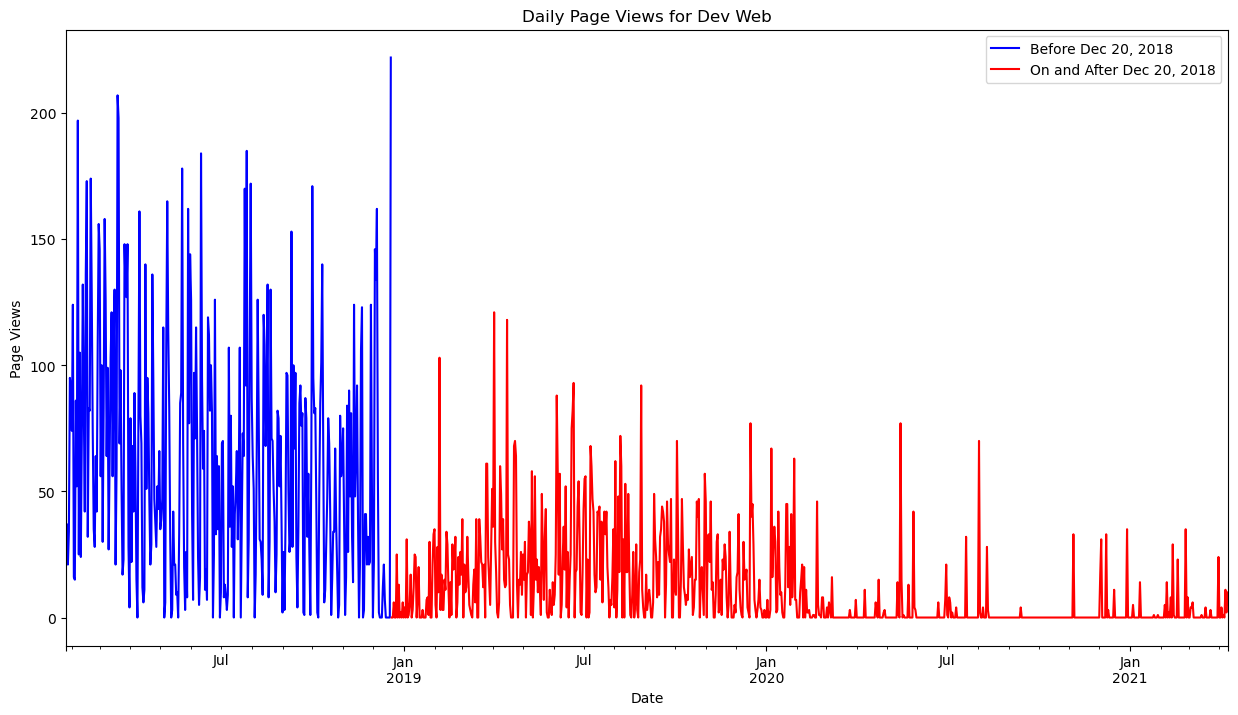

In [18]:
# Filter the DataFrame for 'program_id' == 1 and resample to get daily counts
web_dev_df = codeup_df[codeup_df['program_id'] == 1]
daily_page_views_web_dev = web_dev_df['path'].resample('D').count()

# Plot with different colors before and after December 20th, 2018
plt.figure(figsize=(15, 8))

# Dates before December 20, 2018
daily_page_views_web_dev[daily_page_views_web_dev.index < '2018-12-20'].plot(color='blue', label='Before Dec 20, 2018')

# Dates on and after December 20, 2018
daily_page_views_web_dev[daily_page_views_web_dev.index >= '2018-12-20'].plot(color='red', label='On and After Dec 20, 2018')

plt.title('Daily Page Views for Dev Web')
plt.xlabel('Date')
plt.ylabel('Page Views')

plt.legend()
plt.show()

<span style="background-color: #003366; color: #ffffff; padding: 4px; font-size: 20px;">In `blue` is the page views when all students had access to all programs.  In `red` is when access was restricted to only pertaining program.</span>

In [10]:
# First, filter the DataFrame for 'program_id' == 1
web_dev_df = codeup_df[codeup_df['program_id'] == 1]

# Resample to get daily counts for 'program_id' == 1
daily_page_views_web_dev = web_dev_df['path'].resample('D').count()

# Calculate the mean of daily page views before December 20, 2018
mean_before_dec20 = daily_page_views_web_dev[daily_page_views_web_dev.index < '2018-12-20'].mean()

# Calculate the mean of daily page views on and after December 20, 2018
mean_on_after_dec20 = daily_page_views_web_dev[daily_page_views_web_dev.index >= '2018-12-20'].mean()

print(f'The average daily path visits before the end of 2018 are {mean_before_dec20}')
print(f'The average daily path visits after 2018 are { mean_on_after_dec20}')
print(f'There was a {round((1-(mean_on_after_dec20/mean_before_dec20))*100,1)}% decrease in visits after blocking access to all programs')

The average daily path visits before the end of 2018 are 60.67987804878049
The average daily path visits after 2018 are 10.633451957295375
There was a 82.5% decrease in visits after blocking access to all programs


<div style="background-color: #003366; color: #ffffff; padding: 4px; font-size: 20px;">
  The average daily path visits before the <strong>end of 2018 are 60.7</strong>
</div>
  
<div style="background-color: #003366; color: #ffffff; padding: 4px; font-size: 20px;">
  The average daily path visits <strong>after 2018 are 10.6</strong>
</div>
  
<div style="background-color: #003366; color: #ffffff; padding: 4px; font-size: 20px;">
  There was a <strong>82.5% decrease</strong> in visits after blocking access to all programs
</div>

<div style="color:black;background-color: #ffffcc; font-size: 24px;">
  
  **6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?**</div>

The top 3 references for web dev graduates are:
index.html      1011
javascript-i     736
html-css         542
Name: path, dtype: int64
--------------------------------
The top 3 references for java graduates are:
javascript-i                4229
spring                      3760
search/search_index.json    3562
Name: path, dtype: int64
--------------------------------
The top 3 references for data science graduates are:
search/search_index.json    493
sql/mysql-overview          275
classification/overview     266
Name: path, dtype: int64
--------------------------------


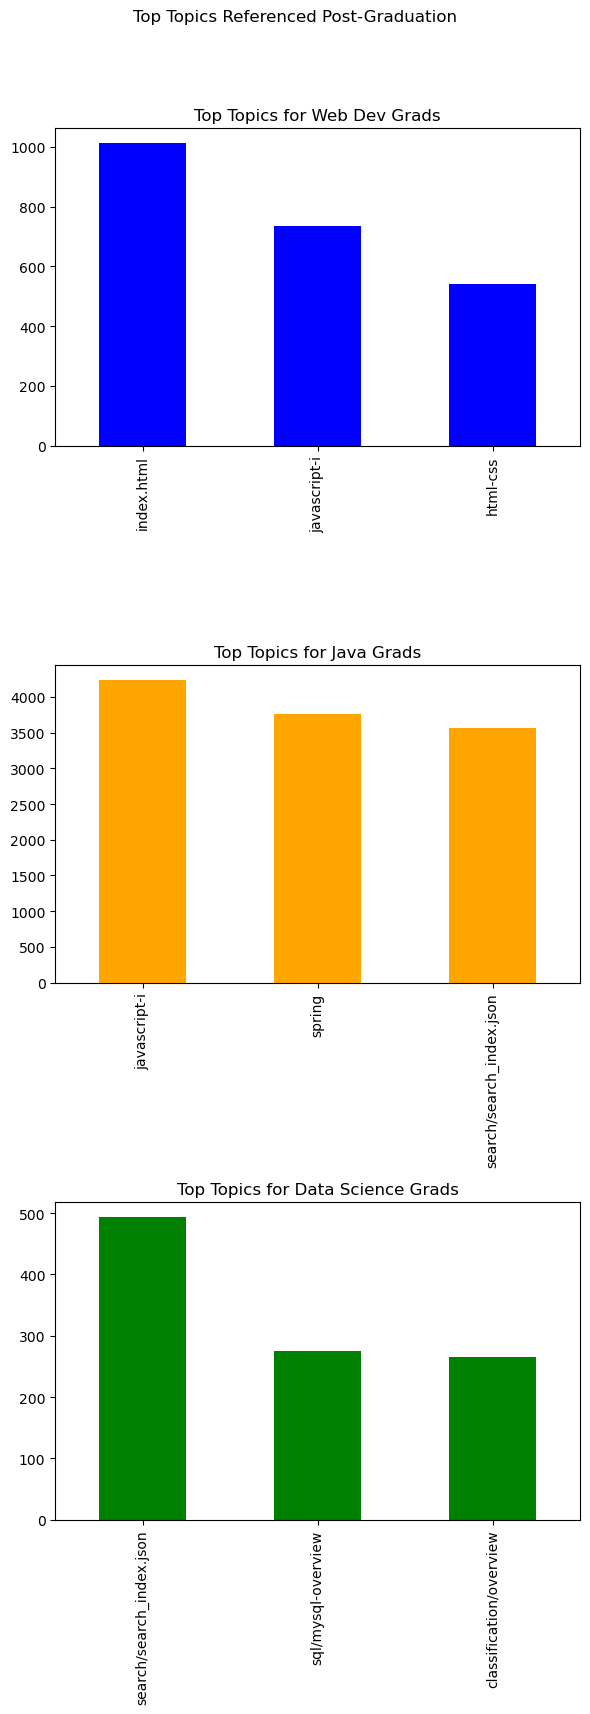

In [11]:
# Filter for activity after the cohort's end date
post_grad_activity = codeup_df[codeup_df.index > codeup_df['end_date']]

# Filter for post-grad activity for each program
web_dev_post_grad = post_grad_activity[post_grad_activity['program_name'] == 'web dev']
java_post_grad = post_grad_activity[post_grad_activity['program_name'] == 'web dev JAVA']
ds_post_grad = post_grad_activity[post_grad_activity['program_name'] == 'data sci']

# Get the top 10 most accessed paths for each program
web_dev_topics = web_dev_post_grad['path'].value_counts().head(3)
java_topics = java_post_grad['path'].value_counts().head(3)
ds_topics = ds_post_grad['path'].value_counts().head(3)
print(f'The top 3 references for web dev graduates are:')
print(web_dev_topics)
print(f'--------------------------------')
print(f'The top 3 references for java graduates are:')
print(java_topics)
print(f'--------------------------------')
print(f'The top 3 references for data science graduates are:')
print(ds_topics)
print(f'--------------------------------')

# Plot all three top topics on one graph for comparison
plt.figure(figsize=(6,18 ))

# Plot for Web Dev Grads
plt.subplot(3, 1, 1)
web_dev_topics.plot(kind='bar', color='blue', title='Top Topics for Web Dev Grads')
plt.xticks(rotation=90)

# Plot for Java Grads
plt.subplot(3, 1, 2)
java_topics.plot(kind='bar', color='orange', title='Top Topics for Java Grads')
plt.xticks(rotation=90)

# Plot for Data Science Grads
plt.subplot(3, 1, 3)
ds_topics.plot(kind='bar', color='green', title='Top Topics for Data Science Grads')
plt.xticks(rotation=90)

plt.suptitle('Top Topics Referenced Post-Graduation')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to fit the title
plt.show()

<span style="background-color: #003366; color: #ffffff; padding: 4px; font-size: 20px;">The top 3 sites graduates use after completing the program are listed above.</span>


<div style="color:black;background-color: #ffffcc; font-size: 24px;">
  
  **7. Which lessons are least accessed?**</div>

In [12]:
# Saving the values for the value counts for path in a variable.
least_accessed_paths = codeup_df['path'].value_counts()

# Filter paths that have been accessed 1 time only
least_accessed_paths = least_accessed_paths[least_accessed_paths == 1]
least_accessed_paths.to_markdown()

"|                                                                                                                                                                                                                                                                         |   path |\n|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------:|\n| asset-manifest.json                                                                                                                                                                                                                                                     |      1 |\n| RESTful-api                                                                                                                                                        

In [13]:
print(f'There are {least_accessed_paths.sum()} paths that only were visited one time')

There are 467 paths that only were visited one time


<span style="background-color: #003366; color: #ffffff; padding: 4px; font-size: 20px;">There are **467** paths that only were `visited one time`</span>


<div style="color:black;background-color: #ffffcc; font-size: 24px;">
  
  **8. Additional observations.**</div>

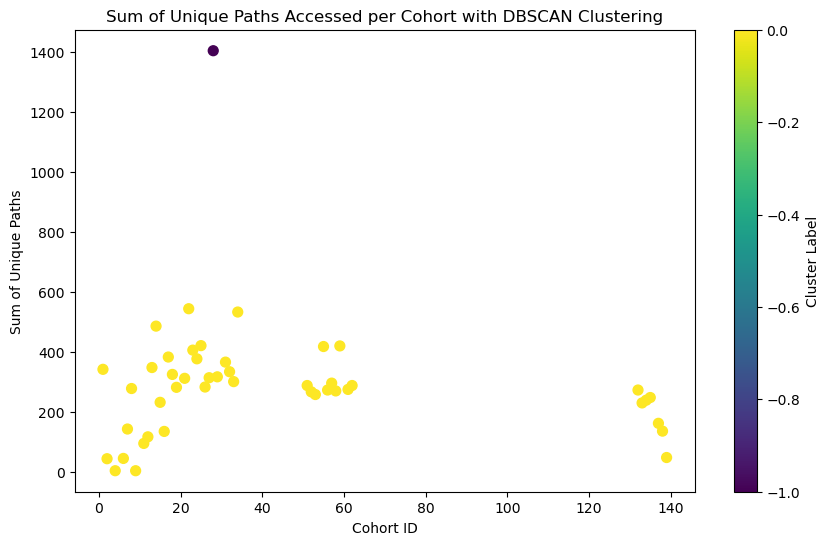

In [15]:
from sklearn.cluster import DBSCAN
# Group by 'cohort_id' and count the unique 'path' entries
cohort_paths_sum = codeup_df.groupby('cohort_id')['path'].nunique()

# Convert the Series to a DataFrame
cohort_paths_sum_df = cohort_paths_sum.reset_index()


# Setting data for plotting the sums of paths for each cohort_id
data = cohort_paths_sum_df[['cohort_id', 'path']].values.T

# Fit the DBSCAN model
db = DBSCAN(eps=125, min_samples=7).fit(data.T)

# Plot with cluster labels
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(data[0], data[1], c=db.labels_, s=50, cmap='viridis')

# Add a colorbar for the cluster labels
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Cluster Label')

ax.set_xlabel('Cohort ID')
ax.set_ylabel('Sum of Unique Paths')
ax.set_title('Sum of Unique Paths Accessed per Cohort with DBSCAN Clustering')

plt.show()


<span style="background-color: #003366; color: #ffffff; padding: 4px; font-size: 20px;">Cohort 28 `['Staff']` is the anomaly in the figure above as it has `800 more` unique path visits compared to all other cohorts.</span>

In [16]:
# Filter the DataFrame for sum of unique paths larger than 600
large_path_counts = cohort_paths_sum_df[cohort_paths_sum_df['path'] > 600]

# Retrieve the 'cohort_id' for those large path counts
cohort_ids_large_paths = large_path_counts['cohort_id']

# Determine what program id 28 is by viewing the entries for those large path counts
program_28_df = codeup_df[codeup_df['cohort_id'].isin(cohort_ids_large_paths)]

# Now you can view the entries for program id 28
program_28_df.cohort.unique()


array(['Staff'], dtype=object)

In [17]:
# Assuming 'codeup_df' is your DataFrame

# Filter the DataFrame for 'cohort_id' == 28
cohort_28_df = codeup_df[codeup_df['cohort_id'] == 28]

# Retrieve the 'cohort' column values
cohort_28_names = cohort_28_df['cohort'].unique()

# Display the unique cohort names for 'cohort_id' == 28
print(f'Cohort 28 is {cohort_28_names}, and is the only cohort with suspicious path ussage.')

Cohort 28 is ['Staff'], and is the only cohort with suspicious path ussage.


### Cohort 28 is `['Staff']`, and is the only cohort with suspicious path ussage.